In [171]:
# ======== imports modules ========

# data table manip
import pandas as pd
import numpy as np
from pandas_datareader import data, wb

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [172]:
# ======== clean csv files ========

# indicators csv (drops blank first row, gets rid of dt indicator columns, sets index to datetime)
indicators = pd.read_csv('Indicators_train.csv').iloc[1:].dropna(how='all')
indicators.date = pd.to_datetime(indicators.date)
for column in indicators:
    if 'dt' in column:
        del indicators[column]
    elif 'date' in column:
        continue
    else:
        indicators[column] = indicators[column].astype(float)
indicators = indicators.set_index(indicators.date)
del indicators['date']

# stock - csv (sets index to datetime)
stock = pd.read_csv('stocks-us-adjClose.csv')
stock.date = pd.to_datetime(stock.date)
stock = stock.set_index(stock.date)
del stock['date']

# sector - csv (loads csv and prints sectors for reference)
sector = pd.read_csv('Company_information.csv', encoding = "ISO-8859-1")
seclist = sector.Sector.unique()
sectorset = []
for member in seclist:
    if str(member) != 'nan':
        sectorset.append(member)

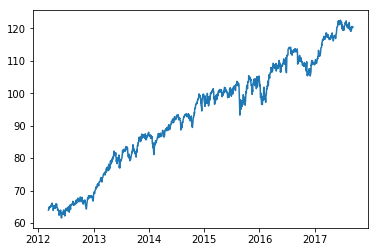

In [173]:
# ======== merge sector and indicators for single dataframe ========

# main sectors - csv
mainsectors = pd.read_csv('sector_ETFs.csv')
mainsectors['Date'] = pd.to_datetime(mainsectors['Date'])
mainsectors = mainsectors.set_index(mainsectors['Date'])
del mainsectors['Date']

# Merge sectors with indicators
sec_indic = pd.merge(mainsectors,indicators, how='inner', left_index=True, right_index=True).dropna(how='any')

# data appears linear and not logarithmic
plt.plot(sec_indic['Consumer Goods (IYK)'])
plt.show()

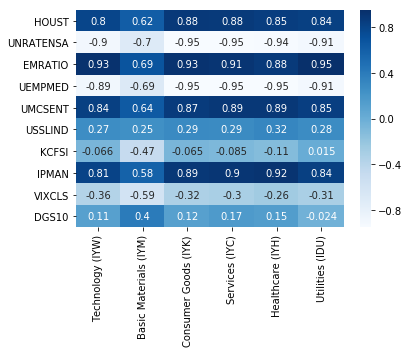

In [174]:
# ======== checks correllations between ticker sectors and macro economic indicators ========

sectors=['Technology (IYW)', 'Basic Materials (IYM)', 'Consumer Goods (IYK)', 'Services (IYC)', 'Healthcare (IYH)', 'Utilities (IDU)']
features=['HOUST', 'UNRATENSA', 'EMRATIO', 'UEMPMED',
       'UMCSENT', 'USSLIND', 'KCFSI', 'IPMAN', 'VIXCLS', 'DGS10']
sec_indic.corr()

# initiate empty dataframe
corr = pd.DataFrame()
for a in features:
    for b in sectors:
        corr.loc[a, b] = sec_indic.corr().loc[a, b]

corr

sns.heatmap(corr,cmap='Blues',annot=True)
plt.show()

# Correlations: Dark blue indicates strong correlation, White indicates strong inverse correlation

In [175]:
sec_indic.resample('W-Fri').mean()

,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),HOUST,UNRATENSA,EMRATIO,UEMPMED,UMCSENT,USSLIND,KCFSI,IPMAN,VIXCLS,DGS10
2012-03-09,69.834488,62.796249,63.997158,74.280342,69.572548,71.152451,699.000000,8.700,58.60,20.300,75.300000,1.530,-0.110000,94.547600,17.530000,2.030000
2012-03-16,71.536007,63.387503,64.678557,75.011808,70.397517,71.308286,699.000000,8.700,58.60,20.300,75.300000,1.530,-0.110000,94.652633,15.458333,2.180000
2012-03-23,72.415806,63.633280,64.862422,75.559467,70.345781,70.530751,698.200000,8.700,58.60,20.300,75.300000,1.530,-0.110000,95.177800,15.228000,2.346000
2012-03-30,73.283513,63.555583,65.379076,76.335573,71.632892,71.098970,698.000000,8.700,58.60,20.300,75.480000,1.530,-0.110000,95.177800,15.254000,2.228000
2012-04-06,73.249749,63.310575,65.835629,76.055408,72.320996,71.502921,698.000000,8.700,58.60,20.300,76.200000,1.530,-0.110000,95.177800,15.984000,2.234000
2012-04-13,71.760452,61.381097,64.450043,74.829469,70.435632,69.890456,698.000000,8.400,58.50,19.900,76.200000,1.530,-0.250000,95.177800,19.288000,2.072000
2012-04-20,70.802906,62.701942,65.100070,75.872391,70.991831,70.691438,661.333333,8.400,58.50,19.900,76.200000,1.530,-0.250000,95.410967,18.666667,2.006667
2012-04-27,70.690369,62.900120,65.235732,75.864562,71.737427,71.561956,654.000000,8.400,58.50,19.900,76.233333,1.560,-0.250000,95.457600,17.570000,1.988333
2012-05-04,70.655656,62.544904,65.465788,77.051961,71.817369,72.355493,654.000000,8.260,58.48,19.800,76.400000,1.710,-0.250000,95.457600,17.470000,1.966000
2012-05-11,68.311032,60.377625,64.338557,75.468768,71.142178,72.329011,654.000000,7.700,58.40,19.400,76.400000,1.710,-0.226000,95.457600,19.358000,1.904000


In [181]:
# ======== runs linear regression analysis ========
def linreg_analysis(sec, ind, trainstart, trainstop, teststart,teststop):
    # choose variables
    collist = [sec,ind]
    xylist = ['x','y']

    # Assigning Test and Training Data ranges
    train_data = sec_indic[trainstart:trainstop][collist]
    train_data.columns = xylist

    test_data = sec_indic[teststart:teststop][collist]
    test_data.columns = xylist

    #Prints the title of the DataFrame
    print("{}:{}".format(sec,ind))

    #Creation of Linear Model Object
    lm = LinearRegression()

    #Slicing of Datasets
    x_train = pd.DataFrame(train_data.iloc[:,0].values)
    y_train = pd.DataFrame(train_data.iloc[:,1].values)

    x_test = pd.DataFrame(test_data.iloc[:,0].values)
    y_test = pd.DataFrame(test_data.iloc[:,1].values)

    #Training the Model by training dataset
    lm.fit(x_train,y_train)

    #Prints the Accuracy of Model
    accuracy = round(lm.score(x_train,y_train) *100,2)
    print('Accuracy:', accuracy)

    #Prints the Coefficients
    print('Coefficients', lm.coef_)

    #Estimated prediction of y_test values based on trained model
    test_data['y_predict'] = lm.predict(x_test)
    
    #graphs test data compared to predicted data
    lines = ['y', 'y_predict']

    plt.plot(test_data[lines])
    plt.show()
    
    return y_predict.tolist()

EMRATIO:Technology (IYW)
(170, 2)
(1241, 2)
Accuracy: 80.41
Coefficients [[ 33.12267748]]


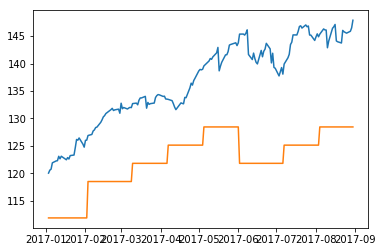

Basic Materials (IYM):EMRATIO
(170, 2)
(1241, 2)
Accuracy: 25.63
Coefficients [[ 0.02918818]]


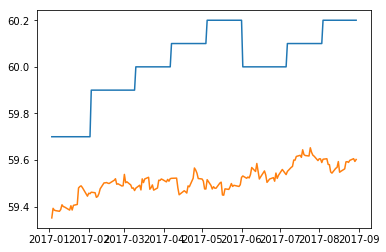

Consumer Goods (IYK):EMRATIO
(170, 2)
(1241, 2)
Accuracy: 80.47
Coefficients [[ 0.02655891]]


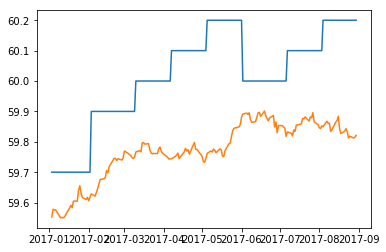

Services (IYC):EMRATIO
(170, 2)
(1241, 2)
Accuracy: 76.41
Coefficients [[ 0.01602693]]


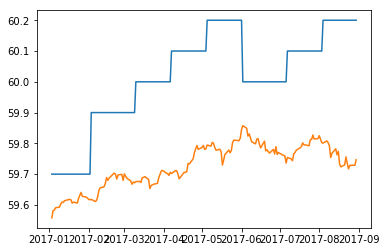

Utilities (IDU):EMRATIO
(170, 2)
(1241, 2)
Accuracy: 86.02
Coefficients [[ 0.02729017]]


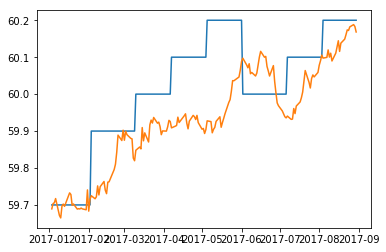

Healthcare (IYH):IPMAN
(170, 2)
(1241, 2)
Accuracy: 85.03
Coefficients [[ 0.13172034]]


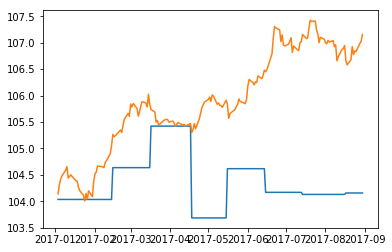

In [183]:
predicted_data = {}

traindate = ['2010','2016-12-29']
testdate = ['2017-01-01','2017-8-30']

predicted_data['Tech'] = linreg_analysis('EMRATIO','Technology (IYW)',traindate[0],traindate[1],testdate[0],testdate[1])
predicted_data['Materials'] = linreg_analysis('EMRATIO','Basic Materials (IYM)',traindate[0],traindate[1],testdate[0],testdate[1])
predicted_data['Consumer'] = linreg_analysis('EMRATIO','Consumer Goods (IYK)',traindate[0],traindate[1],testdate[0],testdate[1])
predicted_data['Services'] = linreg_analysis('EMRATIO','Services (IYC)',traindate[0],traindate[1],testdate[0],testdate[1])
predicted_data['Utilities'] = linreg_analysis('EMRATIO','Utilities (IDU)',traindate[0],traindate[1],testdate[0],testdate[1])
predicted_data['Healthcare'] = linreg_analysis('','IPMAN',traindate[0],traindate[1],testdate[0],testdate[1])

In [180]:
predicted_data

{'Consumer': [[131.1337793962075],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [124.82049236033095],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [127.97713587826911],
  [12